# Study to observe the behavior of precipitation averages between Natal and Salvador (1961-2015)

# Importing libraries

In [244]:
import pandas as pd
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as srn
import scipy.stats as stats
from scipy.stats import f_oneway


# Converting a .txt in .csv

In [64]:
file= pd.read_csv("capitais.txt")
file.to_csv('capitais.csv', index = None)

# Loading and viewing data

In [358]:
capitals= pd.read_csv('capitais.csv', sep = "\t") 
capitals.head()
capitals.describe()

,Year,Month,Natal,Salvador
count,660.000000,660.000000,660.000000,660.000000
mean,1988.000000,6.500000,130.183182,165.815909
std,15.886548,3.454671,129.557720,131.804467
min,1961.000000,1.000000,0.000000,3.200000
25%,1974.000000,3.750000,29.000000,70.500000
50%,1988.000000,6.500000,86.700000,136.800000
75%,2002.000000,9.250000,197.550000,221.450000
max,2015.000000,12.000000,789.000000,889.800000


The data were grouped by seasons
-> The data will be divided into seasons, as they are subdivisions based on weather patterns that represent periods of the year.

In [232]:
# HS: summer(DJF), fall(MAM), winter(JJA) e spring(SON)
summer= capitals.loc[(capitals['Month'] <=2) | (capitals['Month'] == 12)]
fall = capitals.loc[(capitals['Month'] ==3) | (capitals['Month'] ==4) | (capitals['Month'] ==5)]
winter = capitals.loc[(capitals['Month'] ==6) | (capitals['Month'] ==7) | (capitals['Month'] ==8)]
spring = capitals.loc[(capitals['Month'] ==9) | (capitals['Month'] ==10) | (capitals['Month'] ==11)]

# Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of values - Natal')

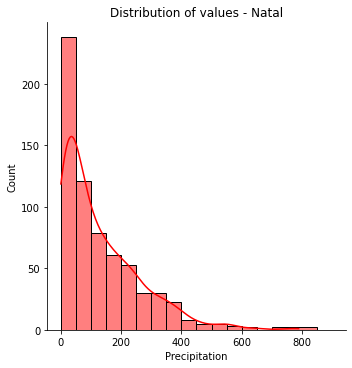

In [27]:
srn.displot(capitals.iloc[:,2], bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 850, 900], color='red',  kde=True)
plt.xlabel('Precipitation')
plt.title('Distribution of values - Natal')

Text(0.5, 1.0, 'Distribution of values - Salvador')

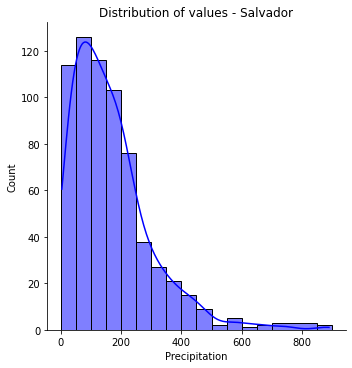

In [28]:
srn.displot(capitals.iloc[:,3], bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 850, 900], color='blue',  kde=True)
plt.xlabel('Precipitation')
plt.title('Distribution of values - Salvador')

From the histograms of the capitals, it can be observed that:<br>

-> Natal presents greater distribution in values close to zero of precipitation;<br>

-> Salvador presents greater distribution of precipitation, mainly in higher values;<br>

-> Values above 400 mm/month may be outliers;

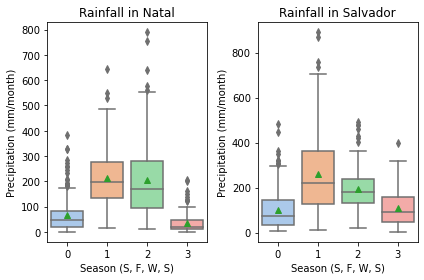

In [13]:
data_natal=[summer['Natal'], fall['Natal'], winter['Natal'], spring['Natal']]
data_salvador=[summer['Salvador'], fall['Salvador'], winter['Salvador'], spring['Salvador']]

plt.figure()
plt.subplot(1, 2, 1)
srn.boxplot(data=data_natal, palette="pastel", showmeans=True)
plt.xlabel("Season (S, F, W, S)")
plt.ylabel("Precipitation (mm/month)")
plt.title("Rainfall in Natal")
plt.subplot(1,2,2)
srn.boxplot(data=data_salvador, palette="pastel", showmeans=True)
plt.xlabel("Season (S, F, W, S)")
plt.ylabel("Precipitation (mm/month)")
plt.title("Rainfall in Salvador")
plt.tight_layout()

By the boxplots of Natal and Salvador:<br>
-> Salvador has higher mean precipitation values than Natal in all seasons, except in winter;<br>
-> Natal presents greater data dispersion during the winter, while Salvador in the summer;<br>
-> Both capitals have outliers.

# Are the average rainfall in the capitals the same?

To answer this question, Analysis of Variance (ANOVA) will be applied for the seasons and for the entire period (1961-2015). ANOVA is a statistical formula used to compare the variances between the medians (or means) of different groups.<br>
> Null hypothesis (H0): Groups means are equal (no variation in means of groups); <br>
> Alternative hypothesis (H1): At least, one group mean is different from other groups;<br>
> P-value 5% 

In [231]:
f_oneway(summer['Natal'],summer['Salvador'])

F_onewayResult(statistic=13.884040219275331, pvalue=0.00022890255516155514)

In [233]:
f_oneway(fall['Natal'],fall['Salvador'])

F_onewayResult(statistic=8.826216893083492, pvalue=0.0031885405048886774)

In [235]:
f_oneway(winter['Natal'],winter['Salvador'])

F_onewayResult(statistic=1.0981319401798166, pvalue=0.29544798975416686)

In [236]:
f_oneway(spring['Natal'],spring['Salvador'])

F_onewayResult(statistic=129.95105294377547, pvalue=1.3896808249982692e-25)

In [243]:
f_oneway(capitals['Natal'],capitals['Salvador'])

F_onewayResult(statistic=24.53321448452392, pvalue=8.250443535258897e-07)

At a significance level of 5% (0.05), H0 was rejected in summer and autumn, that is, the average precipitation of Natal and Salvador are significantly different. While in winter, spring and for the entire time series, H0 is accepted.

# Does the residuals have a normal distribution?

To verify if the data distribution is normal, a probability plot and the Shapiro Wilk test will be used.

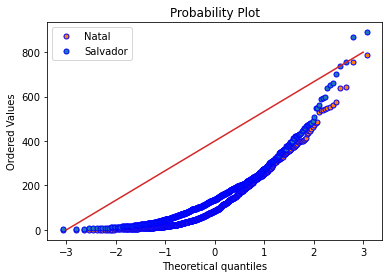

In [341]:
fig, ax =plt.subplots()
stats.probplot(capitals[capitals.columns[2]].values, plot=plt, dist='norm', fit= False)
stats.probplot(capitals[capitals.columns[3]].values, plot=plt, dist='norm', fit= False)

# Change colour of scatter

ax.get_lines()[0].set_markerfacecolor('C1')
ax.get_lines()[0].set_markersize(5.0)

ax.get_lines()[1].set_markerfacecolor('C0')
ax.get_lines()[1].set_markersize(5.0)


# Add on y=x line
ax.plot([-3,3],[0,800], c='C3')
plt.title("Probability Plot")
plt.legend(['Natal','Salvador'],loc='upper left')
plt.show()

Null hypothesis (H0): residuals follow a normal distribution;<br>
Alternative hypothesis (H1) that they do not follow a normal distribution.

In [347]:
shapiro_natal=stats.shapiro(capitals['Natal'])
shapiro_natal

ShapiroResult(statistic=0.8505597114562988, pvalue=1.768893967782831e-24)

In [354]:
shapiro_salvador=stats.shapiro(capitals['Salvador'])
shapiro_salvador

ShapiroResult(statistic=0.8685892820358276, pvalue=4.15048689209214e-23)

About the normal distribution of the data:<br>
-> From the normal probability plot, it is noted that the variables do not have a normal distribution;<br>

->This is confirmed in the Shapiro Wilk test, as the H0 is rejected, indicating that the data do not present a normal distribution. This was expected, since the histograms of precipitation distribution in the capitals were asymmetrical.<br>

# Are the data variances similar?

A Homoscedasticity test will be performed.<br>
> Equal variances, also known as homoscedasticity, is when the variances are approximately the same across the samples (i.e., groups);<br>
> This test, however, should only be used on normally distributed data. However, in order to just apply the technique, the test will be done, but its results will be disregarded.

In [41]:
stats.bartlett(capitals['Natal'],capitals['Salvador'])

BartlettResult(statistic=0.19464307346925777, pvalue=0.6590799992277592)

Null Hypothesis (H0): the variances are equal across all samples/groups;<br>
Alternative Hypothesis (H1):  the variances are not equal across all samples/groups.<br>
> By the result of the p-value it can be said that the data have equal variance.


# Results

My main objective was to show the behavior of precipitation in the seasons and in the time series for Natal and Salvador. Was found:<br>
-> Natal presents greater distribution in values close to zero of precipitation;<br>

-> Salvador presents greater distribution of precipitation, mainly in higher values;<br>

-> Both distributions are asymmetrical;<br>

-> Both have outliers, this can be a consequence of measurement errors;<br>

-> Salvador has higher mean precipitation values than Natal in all seasons, except in winter;<br>

-> Natal presents greater data dispersion during the winter, while Salvador in the summer;<br>

-> At a significance level of 5% (0.05), the average precipitation of Natal and Salvador are significantly different in summer and autum; <br>

-> Is noted that the variables do not have a normal distribution;<br>

-> Shapiro Wilk test indicate that the data do not present a normal distribution. This was expected, since the histograms of precipitation distribution in the capitals were asymmetrical.<br>